In [456]:
import json

adjusted_p_values = {}
adjusted_p_values_pp = {}
adjusted_p_values_co = {}
adjusted_p_values_tvae = {}
# dicts = {'adjusted_real': adjusted_p_values, 'adjusted_pp': adjusted_p_values_pp, 'adjusted_co': adjusted_p_values_co, 'adjusted_tvae': adjusted_p_values_tvae}  # Add more dictionaries as needed
dicts = {'real_adjust': adjusted_p_values, 'pp_adjust': adjusted_p_values_pp, 'co_adjust': adjusted_p_values_co, 'tvae_adjust': adjusted_p_values_tvae}  # Add more dictionaries as needed

# Load each JSON file and update the corresponding dictionary
for key, value in dicts.items():
    file_path = f'crc/pval/{key}.json'
    with open(file_path, 'r') as json_file:
        value.update(json.load(json_file))

In [457]:
adjusted_p_values

{'5': {'A1AG2': [0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
   0.12674283170318001,
  

In [481]:
#Read datasets
import pandas as pd
filepath = 'datapaper/'
#EGF data
# data0 = pd.read_csv(filepath+'dataegf.csv')
# data1 = pd.read_csv(filepath+'dataegfintAKT0.csv')
# data0['Condition'] = 0
# data1['Condition'] = 1
# data = pd.concat([data0, data1], ignore_index=True)

# Melanoma data
# data = pd.read_csv(filepath+'meldataclean.csv')
# data = data.drop('Unnamed: 0',axis=1)
# data.rename(columns={'BioReplicate': 'Condition'}, inplace=True)

#CRC
data = pd.read_csv(filepath+'crc_silvia_data.csv')
condition_mapping = {'Healthy': 0, 'CRC': 1}
# Replace values in the "Condition" column
data['Condition'] = data['Condition'].replace(condition_mapping)
data.head()
# PDAC data
# data = pd.read_csv(filepath+'pdacdata.csv')
real_data = data 

In [482]:
import numpy as np
max_sample_size = 100
step_size = 5

# Initialize lists to store results
sample_sizes = list(range(5, max_sample_size + 1, step_size))
real = {col: [] for col in real_data.columns[:-1]}
pp = []
co = []
tvae = []
# Proteins with Significant Differences:
# Index(['PI3K', 'AKT', 'Raf', 'Mek', 'Erk'], dtype='object')
# Proteins with insignificant Differences:
# Index(['EGFR', 'IGFR', 'SOS', 'Ras'], dtype='object')
# cols = ['RS4X_HUMAN', 'RL23_HUMAN', 'MYH10_HUMAN','RBMX_HUMAN']
# Index(['DHX15_HUMAN', 'G3P_HUMAN', 'HSPB1_HUMAN', 'ENOA_HUMAN', 'NPM_HUMAN',
#        'HS90A_HUMAN', 'HNRPC_HUMAN', 'HS90B_HUMAN', 'ANXA5_HUMAN', 'H14_HUMAN',
#        'CH60_HUMAN', 'KPYM_HUMAN', 'ENPL_HUMAN', 'PGAM1_HUMAN', 'NUCL_HUMAN',
#        'RL13_HUMAN', 'MYH10_HUMAN', 'RBMX_HUMAN', 'LPPRC_HUMAN', 'RL28_HUMAN',
#        'SYAC_HUMAN', 'HNRPM_HUMAN', 'RS23_HUMAN', 'TYB10_HUMAN', 'RS4X_HUMAN',
#        'H4_HUMAN', 'RL23_HUMAN', 'HNRPU_HUMAN', 'PSME1_HUMAN', 'EF1A1_HUMAN',
#        'PARK7_HUMAN'],
#       dtype='object')
# Proteins with insignificant Differences:
# Index(['CALR_HUMAN', 'S10AB_HUMAN'], dtype='object')

for col in real_data.columns[:-1]:
    for s in sample_sizes:
#     s = 100
        s = str(s)
        real[col].append(np.median(adjusted_p_values[s][col]))
#         pp[col].append(np.median(adjusted_p_values_pp[s][col]))
#         co[col].append(np.median(adjusted_p_values_co[s][col]))
#         tvae[col].append(np.median(adjusted_p_values_tvae[s][col]))

  

In [483]:
real

{'A1AG2': [0.12674283170318001,
  0.8453454527878119,
  0.5206967423331348,
  0.43696171288461694,
  0.09936733782977727,
  0.0571003592203314,
  0.046862693551988306,
  0.06854846795507269,
  0.09188725334694406,
  0.04164570028239878,
  0.08260100288596432,
  0.0764212796234372,
  0.11156584320263296,
  0.12955548425190375,
  0.10218261870498284,
  0.15708706431301947,
  0.13482776849122233,
  0.15946923933824678,
  0.08414686941548617,
  0.07609948372498361],
 'AFM': [0.8378224867979085,
  0.6094418009795851,
  0.7365193412801353,
  0.6543063655150034,
  0.9709196098295844,
  0.8229277765863403,
  0.9006506858410837,
  0.9200897549948399,
  0.6744859046761955,
  0.5851458459123124,
  0.9300368587187268,
  0.7668614193413366,
  0.42538461066959554,
  0.2691643223289735,
  0.22209720452006845,
  0.21032120281307232,
  0.16444241011987937,
  0.25014994483917197,
  0.1941628389875638,
  0.2622512169022364],
 'AHSG': [0.5891795062067254,
  0.41656795082750886,
  0.4255608392450345,
  0.7

In [464]:
import numpy as np
max_sample_size = 100
step_size = 5

# Initialize lists to store results
sample_sizes = list(range(5, max_sample_size + 1, step_size))
# real = {col: [] for col in real_data.columns[:-1]}
# pp = []
co = []
# tvae = []
real1 = []
# LRG1, SERPINA3, PON1, CP
col = 'TIMP1'
# for col in real_data.columns[:-1]:
for s in sample_sizes:
#     s = 100
    s = str(s)
    real1.append(np.median(adjusted_p_values[s][col]))
#     pp.append(np.median(adjusted_p_values_pp[s][col]))
    co.append(np.median(adjusted_p_values_co[s][col]))
#     tvae.append(np.median(adjusted_p_values_tvae[s][col]))
print(len(co))
col = 'LRG1'
# for col in real_data.columns[:-1]:
for s in sample_sizes:
#     s = 100
    s = str(s)
    real1.append(np.median(adjusted_p_values[s][col]))
#     pp.append(np.median(adjusted_p_values_pp[s][col]))
    co.append(np.median(adjusted_p_values_co[s][col]))
#     tvae.append(np.median(adjusted_p_values_tvae[s][col]))
print(len(co))
col = 'CP'
# for col in real_data.columns[:-1]:
for s in sample_sizes:
#     s = 100
    s = str(s)
    real1.append(np.median(adjusted_p_values[s][col]))
#     pp.append(np.median(adjusted_p_values_pp[s][col]))
    co.append(np.median(adjusted_p_values_co[s][col]))
#     tvae.append(np.median(adjusted_p_values_tvae[s][col]))
print(len(co))

20
40
60


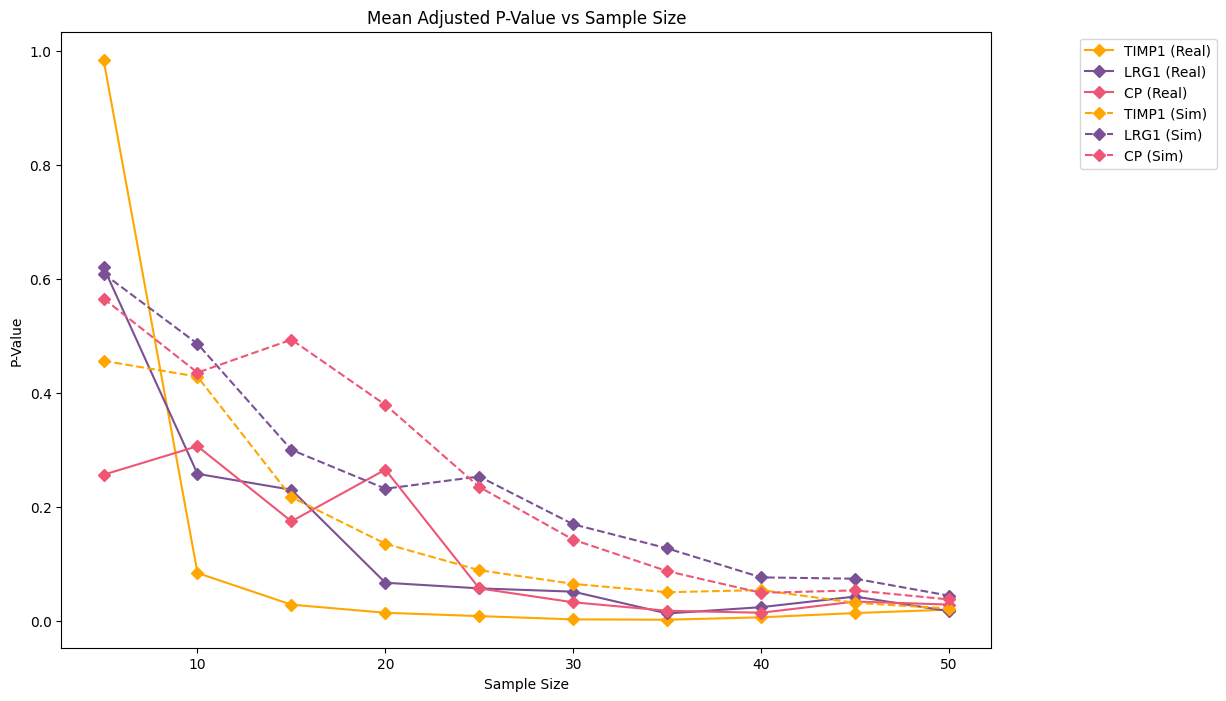

In [466]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
cols = ['Mek', 'EGFR', 'PI3K']

plt.plot(sample_sizes[:10], real1[:10], marker='D', label='TIMP1 (Real)', color='#ffa600', linestyle='-')
plt.plot(sample_sizes[:10], real1[20:30], marker='D', label='LRG1 (Real)', color='#7a5195', linestyle='-')
plt.plot(sample_sizes[:10], real1[40:50], marker='D', label='CP (Real)', color='#ef5675', linestyle='-')

plt.plot(sample_sizes[:10], co[:10], marker='D', label='TIMP1 (Sim)', color='#ffa600', linestyle='dashed')
plt.plot(sample_sizes[:10], co[20:30], marker='D', label='LRG1 (Sim)', color='#7a5195', linestyle='dashed')
plt.plot(sample_sizes[:10], co[40:50], marker='D', label='CP (Sim)', color='#ef5675', linestyle='dashed')
# sns.violinplot(x='day', y='total_bill', data=data, color='green', width=0.2, inner=None)

# Legend with unique labels, colors, linestyles, and markers for each linestyle
# legend_labels = [f'{col} (PP)' for col in cols] + [f'{col} (CO)' for col in cols] + [f'{col} (TVAE)' for col in cols]
# handles = [Line2D([0], [0], marker='o', color=col_colors[col], linestyle='-', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='s', color=col_colors[col], linestyle='dashed', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='D', color=col_colors[col], linestyle=':', label=label) for col, label in zip(cols, legend_labels)]

# plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.title('Mean Adjusted P-Value vs Sample Size')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

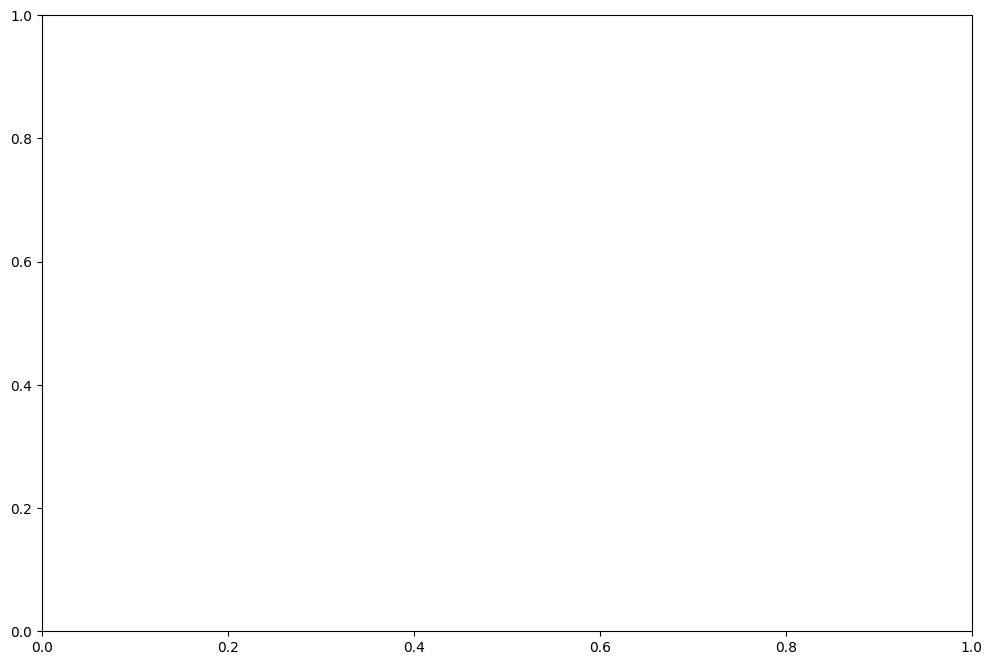

In [352]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
# cols = ['RS4X_HUMAN', 'RL23_HUMAN', 'MYH10_HUMAN','RBMX_HUMAN']

plt.plot(sample_sizes[:10], real1[:10], marker='D', label=f'{col} (Real)', color='#003f5c', linestyle='-')
plt.plot(sample_sizes[:10], pp[:10], marker='o', label=f'{col} (PP)', color='#7a5195', linestyle='-')
plt.plot(sample_sizes[:10], co[:10], marker='s', label=f'{col} (CO)', color='#ef5675', linestyle='dashed')
plt.plot(sample_sizes[:10], tvae[:10], marker='D', label=f'{col} (TVAE)', color='#ffa600', linestyle=':')
# sns.violinplot(x='day', y='total_bill', data=data, color='green', width=0.2, inner=None)

# Legend with unique labels, colors, linestyles, and markers for each linestyle
# legend_labels = [f'{col} (PP)' for col in cols] + [f'{col} (CO)' for col in cols] + [f'{col} (TVAE)' for col in cols]
# handles = [Line2D([0], [0], marker='o', color=col_colors[col], linestyle='-', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='s', color=col_colors[col], linestyle='dashed', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='D', color=col_colors[col], linestyle=':', label=label) for col, label in zip(cols, legend_labels)]

# plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.title('Mean Adjusted P-Value vs Sample Size')

plt.show()

In [353]:
# significance_level = 0.05

In [354]:
# for col  in cols:
#     adjusted_p_values['100']
    

In [355]:
# t_test_results = pd.DataFrame(index=real_data.columns[:-1])
# t_test_results[0] = adjusted_p_values
# tp = t_test_results[t_test_results.le(significance_level).any(axis=1)].index
# tn = t_test_results[t_test_results.gt(significance_level).any(axis=1)].index
# print(t_test_results[t_test_results.le(significance_level).any(axis=1)].index)
# print(len(t_test_results[t_test_results.le(significance_level).any(axis=1)].index))

In [467]:
# real = {col: [] for col in real_data.columns[:-1]}
# p_values = {s:{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}

pp = {str(s):{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
co = {str(s):{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
tvae = {str(s):{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
for col in real_data.columns[:-1]:
    for s in sample_sizes:
#     s = 100
        s = str(s)
#     real[col].append(np.median(adjusted_p_values[s][col]))
        pp[s][col].append(np.median(adjusted_p_values_pp[s][col]))
        co[s][col].append(np.median(adjusted_p_values_co[s][col]))
        tvae[s][col].append(np.median(adjusted_p_values_tvae[s][col]))


In [468]:
real

{'DHX15_HUMAN': [9.92592574833707e-08],
 'G3P_HUMAN': [7.755454594425536e-30],
 'HSPB1_HUMAN': [2.2720746524348594e-13],
 'ENOA_HUMAN': [6.137359335837623e-23],
 'NPM_HUMAN': [3.285906203403581e-22],
 'HS90A_HUMAN': [3.1311915020373725e-24],
 'HNRPC_HUMAN': [2.199998462940549e-07],
 'HS90B_HUMAN': [0.016918457982536682],
 'ANXA5_HUMAN': [2.025323635045593e-26],
 'H14_HUMAN': [0.002316218105941881],
 'CH60_HUMAN': [1.1354416881889548e-07],
 'KPYM_HUMAN': [3.584798246123028e-15],
 'ENPL_HUMAN': [1.0365392103423177e-18],
 'PGAM1_HUMAN': [4.382234195413867e-18],
 'NUCL_HUMAN': [7.084181134746974e-16],
 'RL13_HUMAN': [1.2750382488331549e-06],
 'CALR_HUMAN': [0.11885688260797149],
 'S10AB_HUMAN': [0.3075514120525287],
 'MYH10_HUMAN': [2.6082938790568615e-32],
 'RBMX_HUMAN': [8.28833381793285e-13],
 'LPPRC_HUMAN': [1.2137170696130641e-16],
 'RL28_HUMAN': [5.356456559450226e-09],
 'SYAC_HUMAN': [2.546491568033897e-24],
 'HNRPM_HUMAN': [4.612541773423524e-11],
 'RS23_HUMAN': [3.8655892302261165

In [390]:
# realdf = pd.DataFrame(real)
# r = np.array(realdf.iloc[0])

In [484]:
#Run this
# Given dictionaries for three simulated datasets
simulated_data_1 = adjusted_p_values_pp
simulated_data_2 = adjusted_p_values_co
simulated_data_3 = adjusted_p_values_tvae
real_data = real

# Threshold for considering real values
threshold = 0.05

# Initialize a list to store counts for each simulated dataset
all_dataset_counts = []

# Iterate through each simulated dataset
for simulated_data in [simulated_data_1, simulated_data_2, simulated_data_3]:
    # Initialize a dictionary to store counts for each size
    size_counts = {}

    # Iterate through simulated data for each size
    for size, proteins in simulated_data.items():
        # Initialize counts for the current size
        tp_count = 0
        tn_count = 0
        fp_count = 0
        fn_count = 0

        for protein, values in proteins.items():
            # Check if the real value is less than the threshold
            real_value = real_data.get(protein, [])[0]
            is_real_significant = real_value < threshold

            # Check if the simulated value is less than the threshold
            simulated_value = values[0]
            is_simulated_significant = simulated_value < threshold

            # Update counts based on true/false positives/negatives
            if is_real_significant and is_simulated_significant:
                tp_count += 1
            elif not is_real_significant and not is_simulated_significant:
                tn_count += 1
            elif not is_real_significant and is_simulated_significant:
                fp_count += 1
            elif is_real_significant and not is_simulated_significant:
                fn_count += 1

        # Store counts for the current size
        size_counts[size] = {'TP': tp_count, 'TN': tn_count, 'FP': fp_count, 'FN': fn_count}

    # Append the counts for the current dataset to the list
    all_dataset_counts.append(size_counts)

# Print the counts for each dataset and each size
for dataset_index, dataset_counts in enumerate(all_dataset_counts, start=1):
    print(f"Dataset {dataset_index}:")
    for size, counts in dataset_counts.items():
        print(f"  Size {size}:")
        print("    True Positives (TP):", counts['TP'])
        print("    True Negatives (TN):", counts['TN'])
        print("    False Positives (FP):", counts['FP'])
        print("    False Negatives (FN):", counts['FN'])
        print()


Dataset 1:
  Size 5:
    True Positives (TP): 0
    True Negatives (TN): 66
    False Positives (FP): 0
    False Negatives (FN): 1

  Size 10:
    True Positives (TP): 0
    True Negatives (TN): 65
    False Positives (FP): 1
    False Negatives (FN): 1

  Size 15:
    True Positives (TP): 0
    True Negatives (TN): 65
    False Positives (FP): 1
    False Negatives (FN): 1

  Size 20:
    True Positives (TP): 0
    True Negatives (TN): 64
    False Positives (FP): 2
    False Negatives (FN): 1

  Size 25:
    True Positives (TP): 0
    True Negatives (TN): 63
    False Positives (FP): 3
    False Negatives (FN): 1

  Size 30:
    True Positives (TP): 0
    True Negatives (TN): 63
    False Positives (FP): 3
    False Negatives (FN): 1

  Size 35:
    True Positives (TP): 0
    True Negatives (TN): 63
    False Positives (FP): 3
    False Negatives (FN): 1

  Size 40:
    True Positives (TP): 0
    True Negatives (TN): 62
    False Positives (FP): 4
    False Negatives (FN): 1

  Size

In [407]:
# p = []
# for protein, values in proteins.items():
    
#     # Check if the real value is less than the threshold
#     real_value = real_data.get(protein, [])[0]
#     is_real_significant = real_value < threshold
#     if(is_real_significant==False):
#         p.append(protein)    
#         print(protein)
#         print(is_real_significant)

In [408]:
# for protein, values in proteins.items():
#     real_data.get(protein, [])[0]
#     print(protein)
#     print(real_data.get(protein, [])[0])

In [485]:
import pandas as pd

# ... (previous code)

# Initialize an empty list to store DataFrames for each dataset
all_datasets_dfs = []

# Iterate through each simulated dataset
for dataset_index, simulated_data in enumerate([simulated_data_1, simulated_data_2, simulated_data_3], start=1):
    # Initialize a list to store rows for the current dataset
    rows = []

    # Iterate through simulated data for each size
    for size, counts in all_dataset_counts[dataset_index - 1].items():
        row = {'Dataset': dataset_index, 'Size': size, 'TP': counts['TP'], 'TN': counts['TN'], 'FP': counts['FP'], 'FN': counts['FN']}
        rows.append(row)

    # Create a DataFrame for the current dataset
    dataset_df = pd.DataFrame(rows)

    # Append the DataFrame to the list
    all_datasets_dfs.append(dataset_df)

# Concatenate DataFrames for all datasets
all_datasets_table = pd.concat(all_datasets_dfs, ignore_index=True)

# Print the table
# print(all_datasets_table)

# Save the table to a CSV file
all_datasets_table.to_csv('output_table_crc.csv', index=False)


In [486]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming all_datasets_table is already loaded with the DataFrame

# Iterate through each unique dataset index
for dataset_index in all_datasets_table['Dataset'].unique():
    # Filter rows for the current dataset
    dataset_df = all_datasets_table[all_datasets_table['Dataset'] == dataset_index]

    # Extract true labels and predicted probabilities
    true_labels = [1] * dataset_df['TP'].sum() + [0] * dataset_df['FN'].sum()
    predicted_probs = [1] * dataset_df['TP'].sum() + [0] * dataset_df['FN'].sum() + \
                      [0] * dataset_df['FP'].sum() + [1] * dataset_df['TN'].sum()

    # Ensure that true_labels and predicted_probs have the same length within each dataset
    min_length = min(len(true_labels), len(predicted_probs))
    true_labels = true_labels[:min_length]
    predicted_probs = predicted_probs[:min_length]

    # Calculate precision, recall, and F-score for the current dataset
    precision = precision_score(true_labels, predicted_probs, pos_label=1)
    recall = recall_score(true_labels, predicted_probs, pos_label=1)
    f1 = f1_score(true_labels, predicted_probs, pos_label=1)

    print(f"Metrics for Dataset {dataset_index}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F-score: {f1:.4f}\n")



Metrics for Dataset 1:
  Precision: 0.0000
  Recall: 0.0000
  F-score: 0.0000

Metrics for Dataset 2:
  Precision: 0.0000
  Recall: 0.0000
  F-score: 0.0000

Metrics for Dataset 3:
  Precision: 0.0000
  Recall: 0.0000
  F-score: 0.0000



/opt/anaconda3/envs/realms/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/realms/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/realms/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/anaconda3/envs/realms/lib/python3.8/site-packages/sklearn/met

In [365]:
import pandas as pd
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assuming all_datasets_table is already loaded with the DataFrame

# # Iterate through each unique dataset index
# for dataset_index in all_datasets_table['Dataset'].unique():
#     # Initialize lists to store true labels and predicted probabilities for the current dataset
#     dataset_true_labels = []
#     dataset_predicted_probs = []

#     # Iterate through each row (size) of the current dataset
#     for _, row in all_datasets_table[all_datasets_table['Dataset'] == dataset_index].iterrows():
#         # Extract true labels and predicted probabilities
#         true_labels = [1] * row['TP'] + [0] * row['FN']
#         predicted_probs = [1] * row['TP'] + [0] * row['FN'] + [0] * row['FP'] + [1] * row['TN']

#         # Ensure that true_labels and predicted_probs have the same length within each row
#         min_length = min(len(true_labels), len(predicted_probs))
#         true_labels = true_labels[:min_length]
#         predicted_probs = predicted_probs[:min_length]

#         # Extend the lists for the current dataset
#         dataset_true_labels.extend(true_labels)
#         dataset_predicted_probs.extend(predicted_probs)

#     # Calculate ROC curve for the current dataset
#     fpr, tpr, thresholds = roc_curve(dataset_true_labels, dataset_predicted_probs, pos_label=1)
#     roc_auc = auc(fpr, tpr)

#     # Plot ROC curve for the current dataset
#     plt.plot(fpr, tpr, label=f'Dataset {dataset_index} (AUC = {roc_auc:.2f})')

# # Plot settings
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Across Sizes for Each Dataset')
# plt.legend(loc='lower right')
# plt.show()


In [366]:
# import pandas as pd
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Assuming all_datasets_table is already loaded with the DataFrame

# # Initialize an empty DataFrame to store the results
# metrics_table = pd.DataFrame(columns=['Dataset', 'Size', 'Precision', 'Recall', 'F1 Score'])

# # Iterate through each unique dataset index
# for dataset_index in all_datasets_table['Dataset'].unique():
#     # Iterate through each row (size) of the current dataset
#     for _, row in all_datasets_table[all_datasets_table['Dataset'] == dataset_index].iterrows():
#         # Extract true labels and predicted probabilities
#         true_labels = [1] * row['TP'] + [0] * row['FN']
#         predicted_probs = [1] * row['TP'] + [0] * row['FN'] + [0] * row['FP'] + [1] * row['TN']

#         # Ensure that true_labels and predicted_probs have the same length within each row
#         min_length = min(len(true_labels), len(predicted_probs))
#         true_labels = true_labels[:min_length]
#         predicted_probs = predicted_probs[:min_length]

#         # Calculate precision, recall, and F1 score for the current size
#         precision = precision_score(true_labels, predicted_probs, pos_label=1)
#         recall = recall_score(true_labels, predicted_probs, pos_label=1)
#         f1 = f1_score(true_labels, predicted_probs, pos_label=1)

#         # Append the results to the metrics table
#         metrics_table = metrics_table.append({'Dataset': dataset_index, 'Size': row['Size'],
#                                               'Precision': precision, 'Recall': recall, 'F1 Score': f1},
#                                              ignore_index=True)

# # Display the metrics table
# print(metrics_table)


In [367]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# # ... (previous code)

# # Initialize an empty list to store DataFrames for each dataset
# all_datasets_dfs = []
# all_roc_curves = []

# # Iterate through each simulated dataset
# for dataset_index, simulated_data in enumerate([simulated_data_1, simulated_data_2, simulated_data_3], start=1):
#     # Initialize a list to store rows for the current dataset
#     rows = []

#     # Initialize lists to store true labels and predicted probabilities for ROC curve
#     true_labels = []
#     predicted_probs = []

#     # Iterate through simulated data for each size
#     for size, counts in simulated_data.items():
#         # Extract counts or default to 0 if the keys are not present
#         tp_count = counts.get('TP', 0)
#         tn_count = counts.get('TN', 0)
#         fp_count = counts.get('FP', 0)
#         fn_count = counts.get('FN', 0)

#         # Extend true labels and predicted probabilities based on TP, FN, FP, and TN counts
#         true_labels.extend([1] * (tp_count + fn_count))
#         predicted_probs.extend([1] * tp_count + [0] * fn_count + [0] * fp_count + [1] * tn_count)

#         row = {'Dataset': dataset_index, 'Size': size, 'TP': tp_count, 'TN': tn_count, 'FP': fp_count, 'FN': fn_count}
#         rows.append(row)

#     # Ensure true_labels is binary (0 or 1)
#     true_labels = [int(label) for label in true_labels]

#     # Create a DataFrame for the current dataset
#     dataset_df = pd.DataFrame(rows)

#     # Append the DataFrame to the list
#     all_datasets_dfs.append(dataset_df)

#     # Calculate precision, recall, and F-score
#     precision = precision_score(true_labels, predicted_probs)
#     recall = recall_score(true_labels, predicted_probs)
#     f1 = f1_score(true_labels, predicted_probs)

#     print(f"Metrics for Dataset {dataset_index}:")
#     print(f"  Precision: {precision:.4f}")
#     print(f"  Recall: {recall:.4f}")
#     print(f"  F-score: {f1:.4f}\n")

#     # Plot ROC curve
#     fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
#     roc_auc = auc(fpr, tpr)

#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC Curve - Dataset {dataset_index}')
#     plt.legend(loc="lower right")
#     plt.show()

# # Concatenate DataFrames for all datasets
# all_datasets_table = pd.concat(all_datasets_dfs, ignore_index=True)

# # Save the table to a CSV file
# all_datasets_table.to_csv('output_table.csv', index=False)


In [368]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# # ... (previous code)

# # Initialize an empty list to store DataFrames for each dataset
# all_datasets_dfs = []

# # Iterate through each simulated dataset
# for dataset_index, simulated_data in enumerate([simulated_data_1, simulated_data_2, simulated_data_3], start=1):
#     # Initialize a list to store rows for the current dataset
#     rows = []

#     # Iterate through simulated data for each size
#     for size, counts in simulated_data.items():
#         # Extract counts or default to 0 if the keys are not present
#         tp_count = counts.get('TP', 0)
#         tn_count = counts.get('TN', 0)
#         fp_count = counts.get('FP', 0)
#         fn_count = counts.get('FN', 0)

#         row = {'Dataset': dataset_index, 'Size': size, 'TP': tp_count, 'TN': tn_count, 'FP': fp_count, 'FN': fn_count}
#         rows.append(row)

#     # Create a DataFrame for the current dataset
#     dataset_df = pd.DataFrame(rows)
#     all_datasets_dfs.append(dataset_df)

# # Concatenate DataFrames for all datasets
# all_datasets_table = pd.concat(all_datasets_dfs, ignore_index=True)

# # Save the table to a CSV file
# all_datasets_table.to_csv('output_table.csv', index=False)

# # Load the saved table
# loaded_table = pd.read_csv('output_table.csv')

# # Iterate through each dataset
# for dataset_index in loaded_table['Dataset'].unique():
#     dataset_df = loaded_table[loaded_table['Dataset'] == dataset_index]

#     # Extract true labels and predicted probabilities
#     true_labels = [1] * dataset_df['TP'].sum() + [0] * dataset_df['FN'].sum()
#     predicted_probs = [1] * dataset_df['TP'].sum() + [0] * dataset_df['FN'].sum() + \
#                       [0] * dataset_df['FP'].sum() + [1] * dataset_df['TN'].sum()

#     # Calculate precision, recall, and F-score
#     precision = precision_score(true_labels, predicted_probs, pos_label=1)
#     recall = recall_score(true_labels, predicted_probs, pos_label=1)
#     f1 = f1_score(true_labels, predicted_probs, pos_label=1)

#     print(f"Metrics for Dataset {dataset_index}:")
#     print(f"  Precision: {precision:.4f}")
#     print(f"  Recall: {recall:.4f}")
#     print(f"  F-score: {f1:.4f}\n")

#     # Plot ROC curve
#     fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
#     roc_auc = auc(fpr, tpr)

#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC Curve - Dataset {dataset_index}')
#     plt.legend(loc="lower right")
#     plt.show()


In [369]:
# df = pd.DataFrame(all_datasets_table)


# # Calculate PPV
# df['PPV'] = df['TP'] / (df['TP'] + df['FP'])

# # Define metrics
# metrics = ['TP', 'TN', 'FP', 'FN']

# # Plotting for all datasets
# unique_datasets = df['Dataset'].unique()

# # Plotting
# fig, axes = plt.subplots(nrows=len(metrics) + 1, ncols=1, figsize=(10, 15))

# for dataset in unique_datasets:
#     subset_df = df[df['Dataset'] == dataset]

#     # PPV Plot
#     axes[0].plot(subset_df['Size'], subset_df['PPV'], label=f'PPV - {dataset}')

#     # Individual Metric Plots
#     for idx, metric in enumerate(metrics):
#         axes[idx + 1].plot(subset_df['Size'], subset_df[metric], label=f'{metric} - {dataset}')

# # Set common labels and titles
# for ax in axes:
#     ax.set_ylabel('Count')
#     ax.set_xlabel('Sample Size')

# axes[0].set_title('Positive Predictive Value (PPV) Plot - All Datasets')

# for idx, metric in enumerate(metrics):
#     axes[idx + 1].set_title(f'{metric} Plot - All Datasets')

# # Add legend outside the plot area
# fig.legend(loc='upper right', title='Datasets')

# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()


In [487]:
all_datasets_table

,Dataset,Size,TP,TN,FP,FN
0,1,5,0,66,0,1
1,1,10,0,65,1,1
2,1,15,0,65,1,1
3,1,20,0,64,2,1
4,1,25,0,63,3,1
5,1,30,0,63,3,1
6,1,35,0,63,3,1
7,1,40,0,62,4,1
8,1,45,0,61,5,1
9,1,50,0,61,5,1


In [411]:
all_datasets_table=all_datasets_table[20:40]

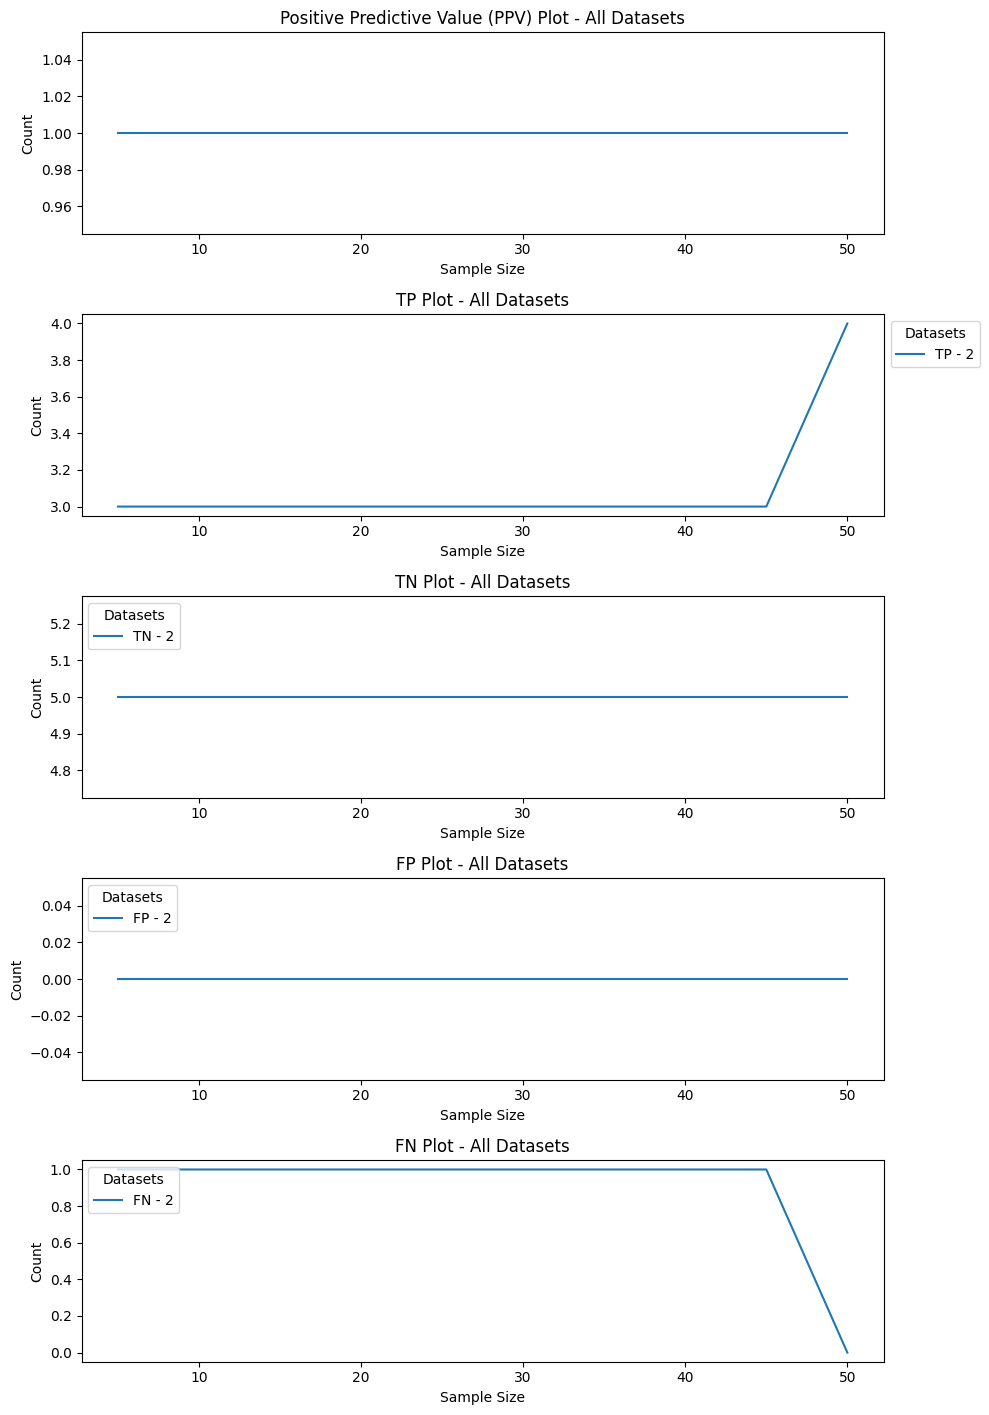

In [415]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Sample DataFrame with multiple datasets
# data = {
#     'Dataset': ['PP'] * 13 + ['CO'] * 13,
#     'Size': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65] * 2,
#     'TP': [0, 0, 5, 9, 14, 19, 21, 21, 21, 21, 21, 21, 21] * 2,
#     'TN': [0, 0, 110, 108, 109, 107, 106, 103, 103, 103, 103, 103, 103] * 2,
#     'FP': [110, 110, 110, 108, 109, 107, 106, 103, 103, 103, 103, 103, 103] * 2,
#     'FN': [30, 30, 25, 21, 16, 11, 9, 9, 9, 9, 9, 9, 9] * 2
# }

# df = pd.DataFrame(data)
df = pd.DataFrame(all_datasets_table)
# # Calculate PPV
df['PPV'] = df['TP'] / (df['TP'] + df['FP'])
df['Size'] = df['Size'].astype(int)
df = df[df['Size'] <= 50]

# Define metrics
metrics = ['TP', 'TN', 'FP', 'FN']

# Plotting for all datasets
unique_datasets = df['Dataset'].unique()

# Plotting
fig, axes = plt.subplots(nrows=len(metrics) + 1, ncols=1, figsize=(10, 15))

for dataset in unique_datasets:
    subset_df = df[df['Dataset'] == dataset]

    # PPV Plot
    axes[0].plot(subset_df['Size'], subset_df['PPV'], label=f'PPV - {dataset}')

    # Individual Metric Plots
    for idx, metric in enumerate(metrics):
        axes[idx + 1].plot(subset_df['Size'], subset_df[metric], label=f'{metric} - {dataset}')

# Set common labels and titles
for ax in axes:
    ax.set_ylabel('Count')
    ax.set_xlabel('Sample Size')

axes[0].set_title('Positive Predictive Value (PPV) Plot - All Datasets')

for idx, metric in enumerate(metrics):
    axes[idx + 1].set_title(f'{metric} Plot - All Datasets')
    axes[idx + 1].legend(loc='upper left', title='Datasets')

# Add legend outside the plot area
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Datasets')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [414]:
all_datasets_table

,Dataset,Size,TP,TN,FP,FN,PPV
20,2,5,3,5,0,1,1.0
21,2,10,3,5,0,1,1.0
22,2,15,3,5,0,1,1.0
23,2,20,3,5,0,1,1.0
24,2,25,3,5,0,1,1.0
25,2,30,3,5,0,1,1.0
26,2,35,3,5,0,1,1.0
27,2,40,3,5,0,1,1.0
28,2,45,3,5,0,1,1.0
29,2,50,4,5,0,0,1.0
